In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import joblib
from sklearn import metrics


In [2]:
# Définir le chemin du répertoire contenant les images
image_dirs = ["../chest_Xray/chest_Xray/train/NORMAL", "../chest_Xray/chest_Xray/train/PNEUMONIA", 
              "../chest_Xray/chest_Xray/test/NORMAL", "../chest_Xray/chest_Xray/test/PNEUMONIA"]
labels = ["NORMAL", "PNEUMONIA", "NORMAL", "PNEUMONIA"]

def preprocess_image(image_dir, target_size=(100, 100)):
    """
    Prétraitement d'une image en niveaux de gris à partir d'un fichier.
    Args:
    - image_dir (str): Le chemin du répertoire contenant les images.
    - target_size (tuple): La taille cible de l'image redimensionnée.
    Returns:    
    - preprocessed_images (list): Liste des images prétraitées normalisées.
    """
    preprocessed_images = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpeg") or filename.endswith(".png"):  # Filtrer les fichiers par extension
            image = cv2.imread(os.path.join(image_dir, filename), cv2.IMREAD_GRAYSCALE)
            resized_image = cv2.resize(image, target_size)
            normalized_image = resized_image / 255.0
            preprocessed_images.append(normalized_image.flatten())
    return preprocessed_images



In [3]:
# Prétraiter les images et concaténer les ensembles de données
preprocessed_images = []
image_labels = []

for label, image_dir in zip(labels, image_dirs):
    images = preprocess_image(image_dir)
    preprocessed_images.extend(images)
    image_labels.extend([label] * len(images))

# Aplatir les images
flattened_images = [image.flatten() for image in preprocessed_images]

# Convertir les listes en tableaux numpy
X = np.array(flattened_images)
y = np.array(image_labels)

# Vérifier les dimensions de X et y
print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

print("Shape of scaled feature matrix:", X_train.shape)
print("Shape of scaled feature matrix test:", X_test.shape)
print("Shape of encoded target vector:", Y_train.shape)
print("Shape of encoded target vector test:", Y_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../chest_Xray/chest_Xray/train/NORMAL'

Variance expliquée par chaque composante: [0.29051386 0.09277266 0.06941183 0.03824205 0.03625453 0.02980334
 0.02605212 0.02145725 0.01731006 0.01412141 0.01235543 0.01130136
 0.01118564 0.01077673 0.00905943 0.00849173 0.00817783 0.00662143
 0.00598076 0.00567779 0.00529494 0.00512313 0.0049721  0.00478597
 0.00415785 0.00400022 0.00376963 0.00370033 0.00349824 0.00341795
 0.00315365 0.00306955 0.00277671 0.00271954 0.00257751 0.00249352
 0.00242038 0.00233823 0.00230248 0.0021615  0.00209416 0.00204666
 0.00195816 0.00187697 0.00179952 0.00172299 0.00164829 0.00161954
 0.00159444 0.00154055 0.00150228 0.0014318  0.00140895 0.00137921
 0.00133654 0.00133287 0.00130893 0.00130171 0.00126245 0.00123473
 0.00121303 0.00119477 0.00116454 0.00109582 0.00106883 0.00106167
 0.00104327 0.00103056 0.00099756 0.00098397 0.00095126 0.00094225
 0.00092716 0.0009056  0.00088932 0.00087385 0.00087153 0.00085297
 0.0008419  0.00082574 0.00081539 0.00081036 0.00079308 0.00077808
 0.0007585  0.000744

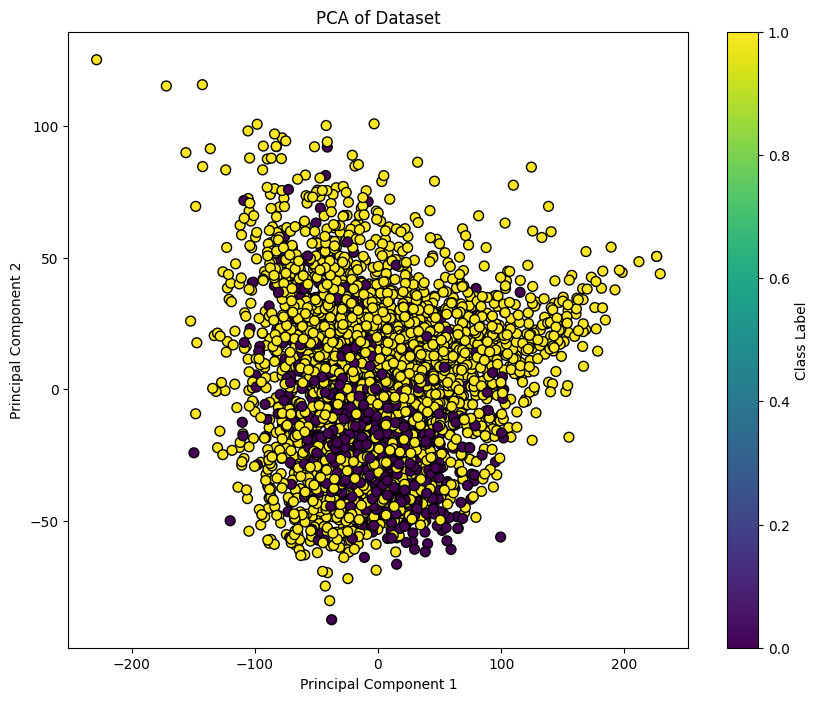

In [ ]:

# Appliquer PCA pour réduire les dimensions à 2 pour la visualisation
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Afficher la variance expliquée
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par chaque composante: {explained_variance}')
print(f'Variance expliquée cumulative: {np.cumsum(explained_variance)}')

# Visualiser les résultats de la PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(scatter, label='Class Label')
plt.show()




In [ ]:
# Définir les hyperparamètres pour la recherche sur grille de l'algorithme de régression logistique
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'] 
}

# Instancier un objet LogisticRegression pour l'entraîner sur les données d'entraînement et de test normalisées et divisées en ensembles
logistic_regression_model = LogisticRegression(max_iter=200)

# Instancier un objet GridSearchCV pour effectuer une recherche sur grille avec une validation croisée de 5
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Exécuter la recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train, Y_train)

# Générer le rapport de classification
y_pred_train_lr = grid_search.best_estimator_.predict(X_test)
report_lr = classification_report(Y_test, y_pred_train_lr, output_dict=True)


# Save the model, scaler, PCA, and classification report
joblib.dump({
    'model': grid_search.best_estimator_,
    'scaler': scaler,
    'pca': pca,
    'classification_report': report_lr
}, 'model_lr.pkl')


# Predictions du meilleur mode 
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Prédire les probabilités
probabilities = best_model.predict_proba(X_test)



   Probabilité Classe 0  Probabilité Classe 1
0          1.410510e-02              0.985895
1          9.811736e-01              0.018826
2          7.965191e-07              0.999999
3          4.344752e-04              0.999566
4          1.873169e-05              0.999981
Mean Squared Error on Test Set: 0.06107305936073059
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       472
           1       0.95      0.96      0.96      1280

    accuracy                           0.94      1752
   macro avg       0.93      0.92      0.92      1752
weighted avg       0.94      0.94      0.94      1752

Best parameters :  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score :  0.9471481626679994


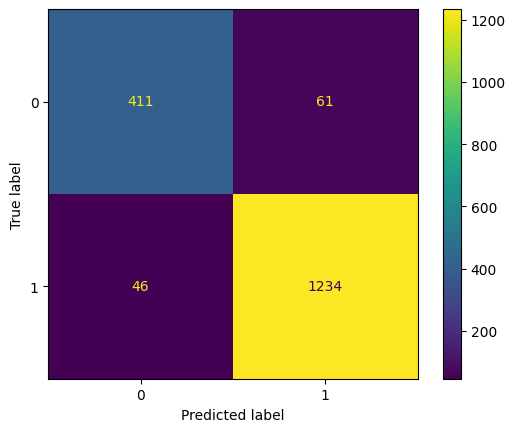

In [ ]:
# Convertir les probabilités en DataFrame pour une meilleure lisibilité
prob_df = pd.DataFrame(probabilities, columns=['Probabilité Classe 0', 'Probabilité Classe 1'])
print(prob_df.head())  # Afficher les 5 premières lignes

# Calculate regression metrics such as mean squared error
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error on Test Set:", mse)

# Display the classification report
report = classification_report(Y_test, predictions)

metrics.ConfusionMatrixDisplay.from_predictions(Y_test, predictions)
print("Classification Report on Test Set:\n", report)

# Best parameters
print("Best parameters : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)
